In [2]:
import pandas as pd
import duckdb

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()


,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


## EDA- Exploratory

In [4]:
df_quantity_make = duckdb.query(
    """
             SELECT make, SUM(quantity) as Quantity 
             FROM df 
             GROUP BY make 
             ORDER BY quantity DESC"""
).df()

df_quantity_make.head()

,Make,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


In [5]:
df_quantity_make.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      65 non-null     object 
 1   Quantity  66 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [6]:
df["Year"].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [7]:
df.head(10)

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
5,2007,1,Skoda,665,5.2
6,2007,1,Opel,622,4.9
7,2007,1,Audi,599,4.7
8,2007,1,Honda,423,3.3
9,2007,1,Mercedes-Benz,362,2.9


## Bar chart

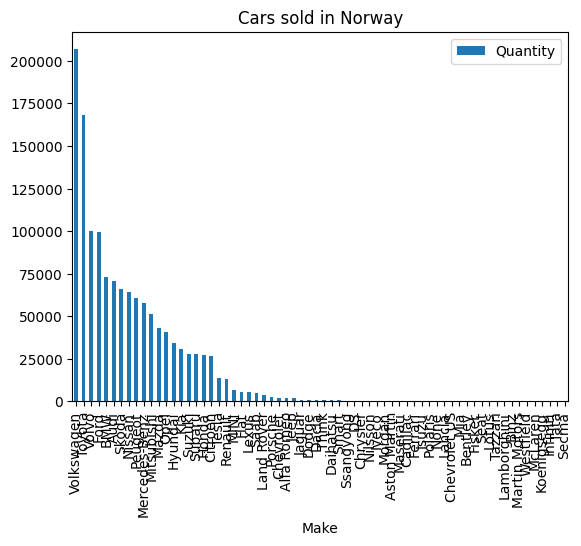

In [10]:
# using dataframes plot method which is a wrapper for matplotlib
ax = df_quantity_make.plot(kind="bar", x="Make", y="Quantity", title = "Cars sold in Norway");

Plot top 5 most popular brands

In [ ]:
df_quantity_brand.pl.head(kind = "bar", x = "Brand", y = "Quantity")

In [ ]:
df_quantity_brand.pl.iloc[3:5].plot(kind = "bar", x = "Brand", y = "Quantity")

## matplotlib bar

### second iteration
#### Here we use matplotlib directly instead of dataframe plot, but the same results could be achieved using dataframe plot. Some modifications have been made
- picked out top 10 most sold cars to visualize
- wider figure size to fit the brand names
- added title, xlabel and ylabel

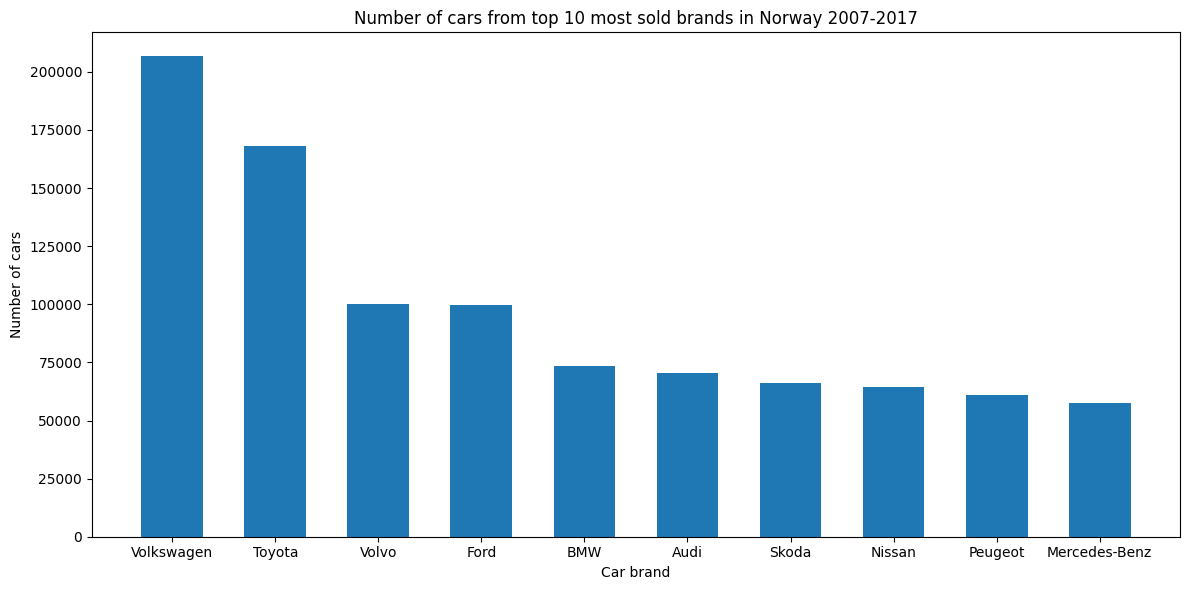

In [12]:
import matplotlib.pyplot as plt


def top_ten_bar():
    df_quantity_make_top_10 = df_quantity_make.iloc[:10]

    fig, ax = plt.subplots(figsize=(12, 6))


    ax.bar(
        x=df_quantity_make_top_10["Make"],
        height=df_quantity_make_top_10["Quantity"],
        width=0.6,
    )

    ax.set(
        title="Number of cars from top 10 most sold brands in Norway 2007-2017",
        xlabel="Car brand",
        ylabel="Number of cars",
    )

    return fig, ax

fig, ax = top_ten_bar();
fig.tight_layout()
fig.savefig("figures/bars_top_10.png")

In [14]:
df_month_make = duckdb.query(
    """
            SELECT year || '-' || LPAD(CAST(month AS VARCHAR),2,'0') AS date, 
                    make, SUM(quantity) AS Quantity FROM df
            WHERE make IN ('Volvo', 'Volkswagen', 'Toyota')
            GROUP BY year, month, make 
            ORDER BY year, month
    """
).df()

# df_month_make.plot(kind = "bar", x = "date", y = "quantity" )
# df_month_make
df_month_make["date"] = pd.to_datetime(df_month_make["date"], format="%Y-%m")
df_month_make_pivot = df_month_make.pivot(index='date', columns='Make', values='Quantity').fillna(0)

df_month_make_pivot.head()

Make,Toyota,Volkswagen,Volvo
date,,,
2007-01-01,2884.0,2521.0,693.0
2007-02-01,1885.0,1517.0,570.0
2007-03-01,1833.0,1428.0,656.0
2007-04-01,1300.0,1257.0,587.0
2007-05-01,1866.0,1934.0,805.0


In [15]:
months = df_month_make_pivot.loc["2016"].index.month_name()
months

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object', name='date')

[Text(0.5, 1.0, 'Number of cars sold from Toyota, Volkswagen and Volvo in 2016 in Norway'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Number cars')]

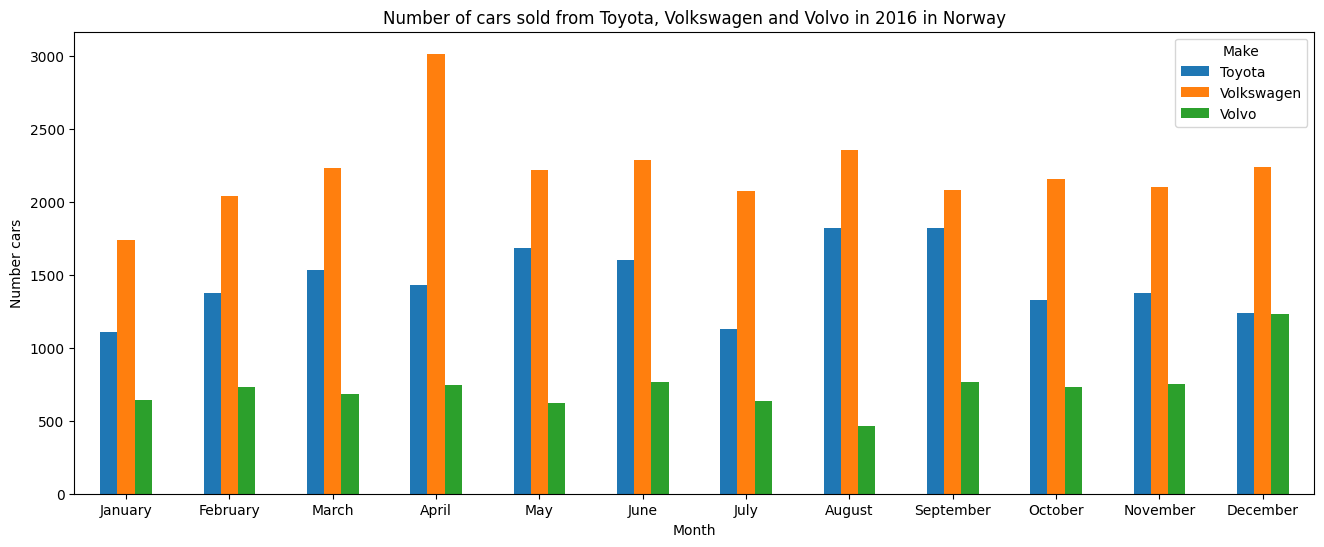

In [16]:
ax = df_month_make_pivot.loc["2016"].plot(kind="bar", figsize=(16, 6))
ax.set_xticklabels(months, rotation=0)
ax.set(
    title="Number of cars sold from Toyota, Volkswagen and Volvo in 2016 in Norway",
    xlabel="Month",
    ylabel="Number cars",
)

In [ ]:
df_quantity_brand_top10["Quantity"]

## Line chart

In [17]:
df_quantity_year = duckdb.query("""
    SELECT 
        year, 
        SUM(quantity) AS Quantity
    FROM df
    GROUP BY year
    ORDER BY
        year
""").df().set_index("Year")

df_quantity_year

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


In [ ]:
df.tail()

In [ ]:
df_quantity_year.iloc[:-1].plot()

In [ ]:
df_quantity_year.iloc[:-1].plot(title = "Car sales in Noway between 2007-2016", xlabel = "Year", ylabel = "Number cars sold", style="--0", linewidth=2)

ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()

fig.savefig("figures/car_sales_wearly_lin.png")